# Prior Predictive Analysis for SV Model

-  Step 1: Simulate hypothetical parameters iid via generated quantities block in Stan

- Step 2: Compute simulated data via the likelihood function (in Stan)

- Step 3: Compare simulated data with observed data to validate priors

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("Current working directory: ", os.getcwd())

Current working directory:  c:\Users\nklatsky\econometrics\econometrics2024\project\code\stochastic_volatility


## Read in Real Data

In [3]:
# Read in the train-test split 
# Read train_test.csv
train_test_split = pd.read_csv("../../train_test.csv")
train_size = train_test_split['train'][0]
test_size = train_test_split['test'][0]

# Define data path:
data_path = "../../data/DXY_approx_percent_returns.csv"
real_data = pd.read_csv(data_path, index_col=0)
real_data = real_data - np.mean(real_data)

# calculate the splitting point as the train_size * len of data, rounded
split_point = int(train_size * len(real_data))

# Take training data range only
real_data = real_data.iloc[:split_point]
real_data


,DXY
Date,
1994-04-01,-0.435009
1994-05-01,0.030122
1994-06-01,0.247245
1994-07-01,-0.768186
1994-10-01,0.362673
...,...
2018-02-21,0.315110
2018-02-22,-0.294709
2018-02-23,0.162735


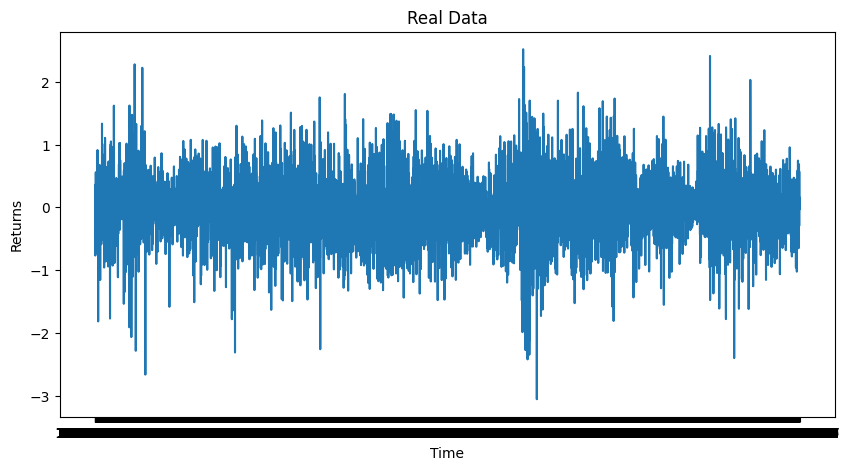

In [4]:
# Plot the real data:
plt.figure(figsize=(10, 5))
plt.plot(real_data)
plt.title("Real Data")
plt.xlabel("Time")
plt.ylabel("Returns")
plt.show()


## Read in Generated Data

In [5]:
# Read in generated data from prior predictive distribution(y_sim_samples)

sv_y_sim_path = "sampler_outputs/y_sim_samples.csv"
sv_y_sim = pd.read_csv(sv_y_sim_path)
sv_y_sim

,0,1,2,3,4,5,6,7,8,9,...,6231,6232,6233,6234,6235,6236,6237,6238,6239,6240
0,0.859836,-0.414110,-0.625278,-0.666503,-0.937403,-0.736558,1.824280,1.458390,1.402700,-0.498735,...,-1.490550,0.596752,1.446610,-0.742630,-1.825690,1.546840,-1.201480,-0.904285,1.127060,3.397890
1,0.242067,-0.227028,0.177125,0.069585,0.019167,0.041840,0.105259,-0.325272,-0.340508,0.377888,...,0.167569,0.256670,-0.220238,-0.921453,-0.992697,0.116838,0.018664,0.941042,0.456439,-0.001375
2,-0.128626,0.221937,-0.344933,1.022230,-0.345341,-0.027873,-0.240333,0.009530,-0.126846,-0.154060,...,0.034960,0.170655,0.000226,-0.265366,-0.006181,-0.070177,0.078782,-0.149380,-0.228603,-0.046907
3,0.082886,0.761502,-0.139913,0.525844,-0.044984,0.773706,-0.022299,0.047682,0.281046,1.023270,...,-0.783300,0.032419,0.465766,0.915338,1.188490,-0.657593,0.829093,-0.498811,0.045288,-0.476312
4,0.369383,-0.863288,-0.478075,1.732570,0.933488,-1.205420,0.974655,0.831799,-0.415401,0.907908,...,0.438303,-0.067171,-0.267067,-0.785333,-0.010062,0.165121,-0.368451,0.314768,-0.571889,-0.372665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.322077,0.358565,-0.134001,-0.611444,-0.387600,-0.155819,0.227150,-0.000270,0.595274,-0.447821,...,0.212990,-0.484974,-0.549932,-0.295535,0.108247,-0.652643,-0.329421,-0.462445,0.146764,-0.843963
3996,1.624740,-0.048976,-0.942669,-2.243940,-3.228070,1.148090,2.485030,0.084830,-1.696460,-0.187913,...,0.888205,0.919028,1.581840,0.699164,2.626550,0.061329,-1.461930,2.142420,1.132490,0.394829
3997,-0.304608,-0.189919,-0.649499,0.536237,0.256747,-0.175272,-0.182302,-0.015834,0.814232,0.522243,...,0.471700,-0.195895,-0.215476,0.801639,-0.201600,-0.010250,-0.133896,-0.494490,0.298444,-0.210674
3998,1.546580,-0.389151,0.044863,-0.227510,0.294082,-0.066481,-0.082337,0.111756,-0.605781,0.127187,...,-0.934006,0.514116,-0.834016,-0.964783,-0.090859,-0.995876,0.913365,-0.689251,0.175790,0.093085


In [6]:
# Flatten sv_y_sim and print the min, max, and quantiles
sv_y_sim_flat = sv_y_sim.values.flatten()
print("Min: ", np.min(sv_y_sim_flat))
print("Max: ", np.max(sv_y_sim_flat))
print("Mean: ", np.mean(sv_y_sim_flat))
print("Quantiles: ", np.quantile(sv_y_sim_flat, [0.025, 0.975]))


# Print the number of values with abs > 100
print("Number of values with abs > 1000: ", np.sum(np.abs(sv_y_sim_flat) > 1000))
# > 100
print("Number of values with abs > 100: ", np.sum(np.abs(sv_y_sim_flat) > 100))


Min:  -7366980000.0
Max:  53721400000.0
Mean:  1595.787961080557
Quantiles:  [-2.43015025  2.43119   ]
Number of values with abs > 1000:  2196
Number of values with abs > 100:  8569


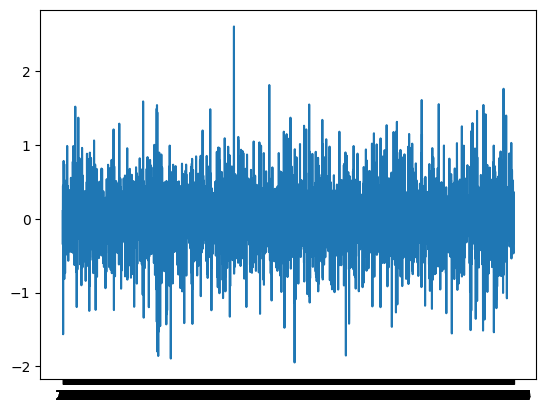

In [7]:
# Plot one sample series
idx = 1005
plt.plot(sv_y_sim.iloc[idx])
plt.show()

In [8]:
# Read in the generated parameters to validate:

h_sim_path = "sampler_outputs/h_sim_samples.csv"
h_std_sim_path = "sampler_outputs/h_std_sim_samples.csv"
mu_sim_path = "sampler_outputs/mu_sim_samples.csv"
phi_sim_path = "sampler_outputs/phi_sim_samples.csv"
sigma_sim_path = "sampler_outputs/sigma_sim_samples.csv"
scale_sim_path = "sampler_outputs/scale_sim_samples.csv"


h_sim = pd.read_csv(h_sim_path)
h_std_sim = pd.read_csv(h_std_sim_path)
mu_sim = pd.read_csv(mu_sim_path)
phi_sim = pd.read_csv(phi_sim_path)
sigma_sim = pd.read_csv(sigma_sim_path)
scale_sim = pd.read_csv(scale_sim_path)





In [9]:
# Find mean, std, min, max, and median for h_sim, h_std_sim, mu_sim, phi_sim, sigma_sim
def print_summary_stats(data, name):
    print(name)
    print("Mean: ", np.mean(data))
    print("Std: ", np.std(data))
    print("Min: ", np.min(data))
    print("Max: ", np.max(data))
    print("Median: ", np.median(data))
    print("\n")

vars_list = [h_sim, h_std_sim, mu_sim, phi_sim, sigma_sim, scale_sim]
names_list = ["h_sim", "h_std_sim", "mu_sim", "phi_sim", "sigma_sim", "scale_sim"]

for i in range(len(vars_list)):
    print_summary_stats(vars_list[i].values.flatten(), names_list[i])

h_sim
Mean:  -0.46547822813400175
Std:  1.4080558963399836
Min:  -25.5484
Max:  25.8556
Median:  -0.451603


h_std_sim
Mean:  -2.4328075690020547e-05
Std:  1.0000064681248881
Min:  -5.47444
Max:  5.44622
Median:  -0.00016204050000000002


mu_sim
Mean:  -0.46500077263178
Std:  1.0044175946523417
Min:  -3.88923
Max:  2.74063
Median:  -0.4563115


phi_sim
Mean:  0.7472071849999999
Std:  0.09812430248347387
Min:  0.274721
Max:  0.998099
Median:  0.749556


sigma_sim
Mean:  0.427299608425
Std:  0.3991819794262853
Min:  0.0435192
Max:  2.98968
Median:  0.29376349999999996


scale_sim
Mean:  1.303871887752103
Std:  114.00528619592016
Min:  2.83307e-06
Max:  411589.0
Median:  0.797876




# Comparison

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  0.0038081233879186127


Real std:  DXY    0.49879
dtype: float64
Simulated std:  1.8714291037900754


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -7.74088


Real max:  DXY    2.51896
dtype: float64
Simulated max:  7.75092


Real Median:  DXY   -0.000945
dtype: float64
Simulated Median:  0.00788417




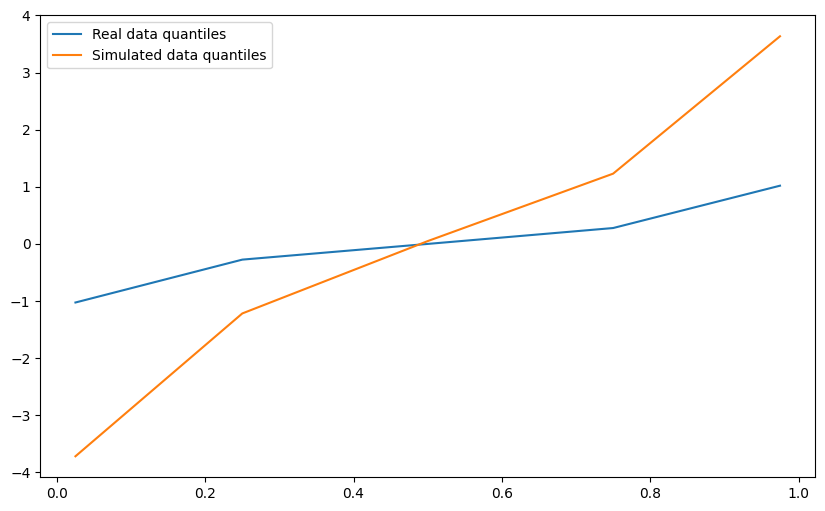

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  -0.007697747626918762


Real std:  DXY    0.49879
dtype: float64
Simulated std:  0.5654557726511023


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -2.35966


Real max:  DXY    2.51896
dtype: float64
Simulated max:  2.00362


Real Median:  DXY   -0.000945
dtype: float64
Simulated Median:  0.00788417




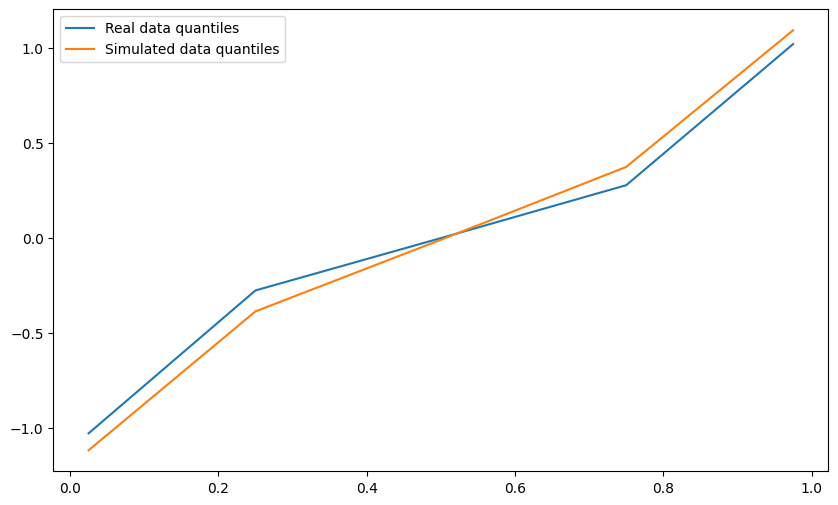

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  -0.010724936255888474


Real std:  DXY    0.49879
dtype: float64
Simulated std:  0.9144895776376022


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -5.15946


Real max:  DXY    2.51896
dtype: float64
Simulated max:  4.52818


Real Median:  DXY   -0.000945
dtype: float64
Simulated Median:  0.00788417




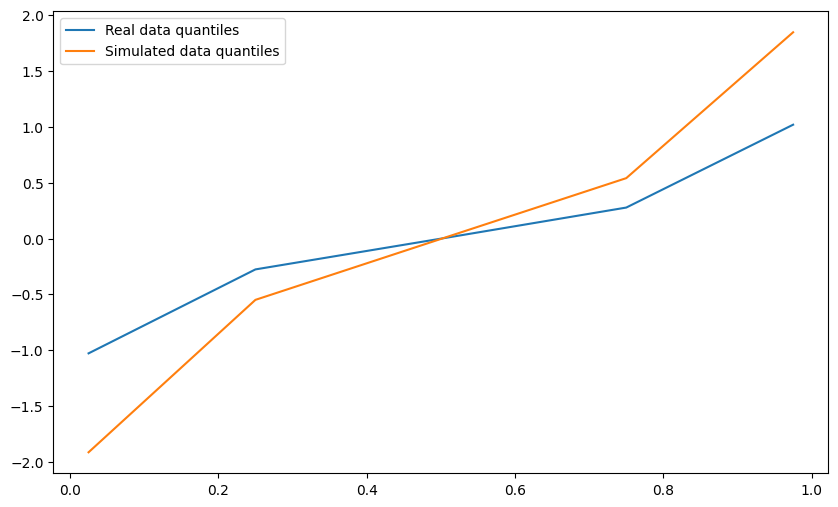

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  0.0024981439072264073


Real std:  DXY    0.49879
dtype: float64
Simulated std:  1.0366374927796715


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -4.77209


Real max:  DXY    2.51896
dtype: float64
Simulated max:  5.86523


Real Median:  DXY   -0.000945
dtype: float64
Simulated Median:  0.00788417




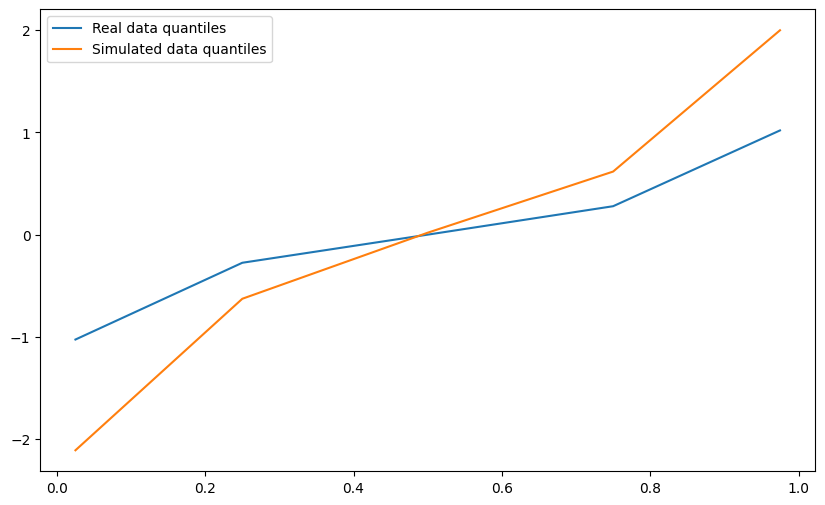

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  0.005945165672328151


Real std:  DXY    0.49879
dtype: float64
Simulated std:  0.5314387470526033


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -2.57387


Real max:  DXY    2.51896
dtype: float64
Simulated max:  2.4066


Real Median:  DXY   -0.000945
dtype: float64
Simulated Median:  0.00788417




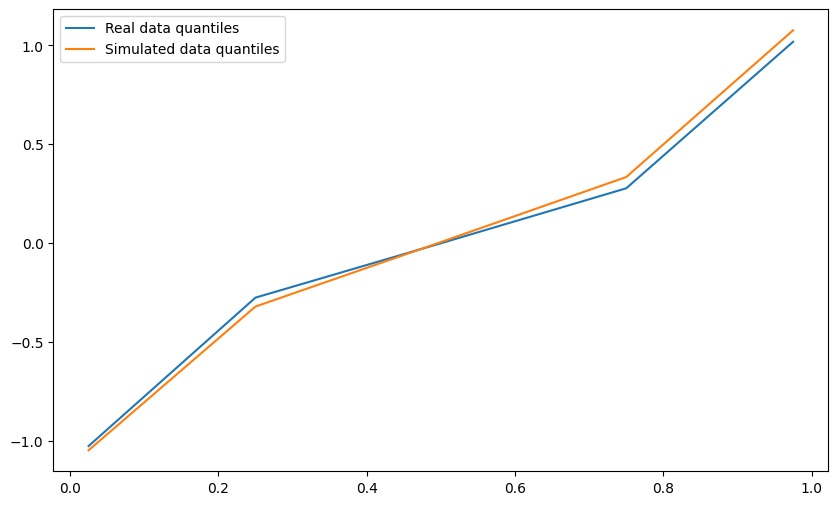

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  0.015459901565774712


Real std:  DXY    0.49879
dtype: float64
Simulated std:  0.7069869586009523


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -3.35151


Real max:  DXY    2.51896
dtype: float64
Simulated max:  2.78549


Real Median:  DXY   -0.000945
dtype: float64
Simulated Median:  0.00788417




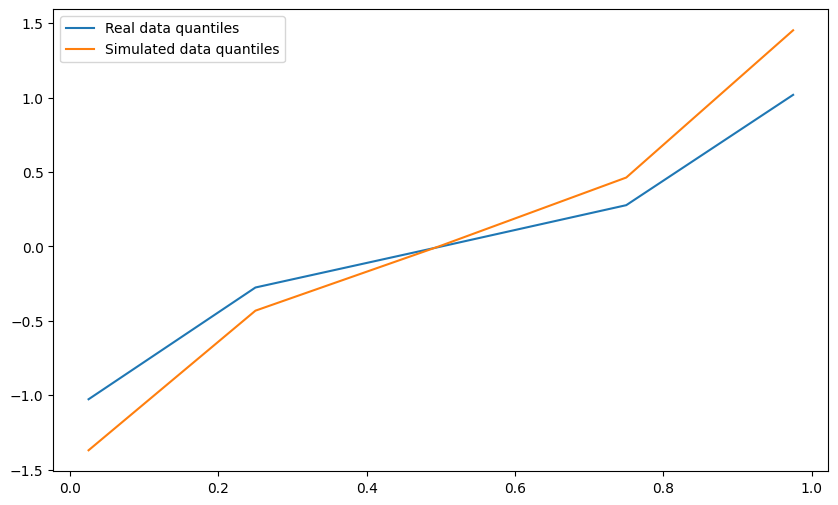

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  0.02273448384217273


Real std:  DXY    0.49879
dtype: float64
Simulated std:  0.8428814142463362


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -5.01754


Real max:  DXY    2.51896
dtype: float64
Simulated max:  4.22279


Real Median:  DXY   -0.000945
dtype: float64
Simulated Median:  0.00788417




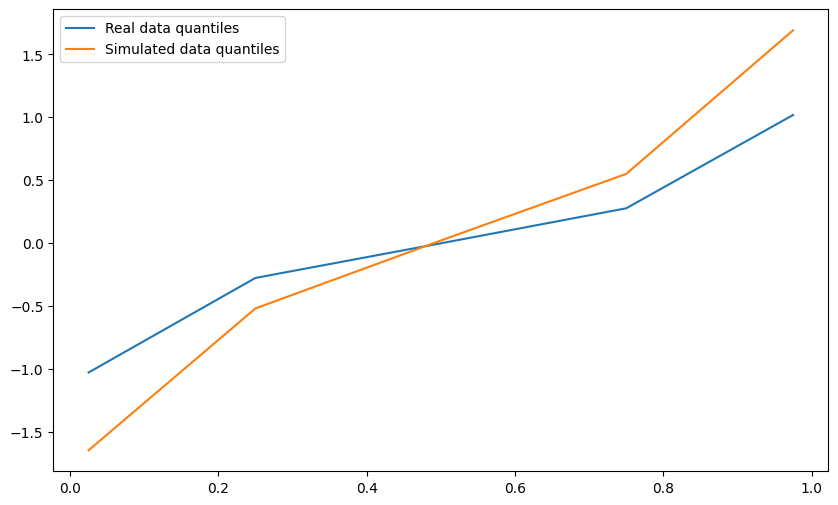

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  -0.005039407912193561


Real std:  DXY    0.49879
dtype: float64
Simulated std:  0.5018674697464149


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -2.28136


Real max:  DXY    2.51896
dtype: float64
Simulated max:  1.99474


Real Median:  DXY   -0.000945
dtype: float64
Simulated Median:  0.00788417




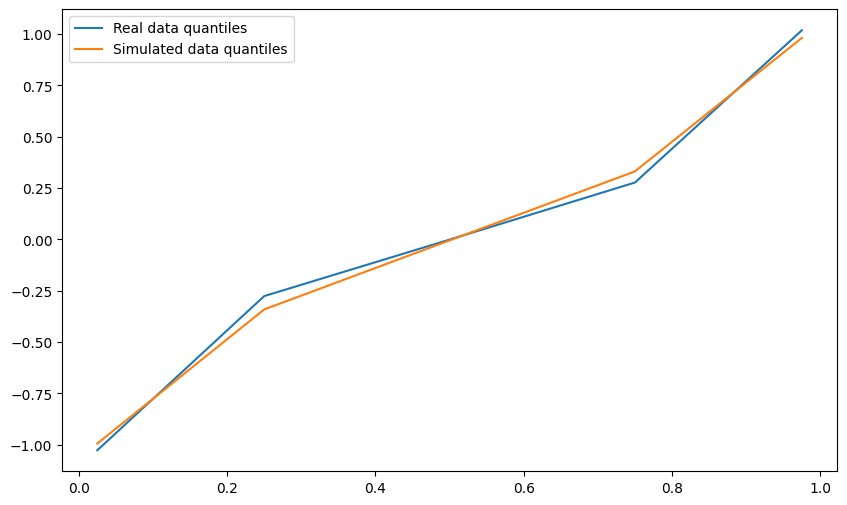

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  0.004526815003017144


Real std:  DXY    0.49879
dtype: float64
Simulated std:  0.622190924245575


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -2.5654


Real max:  DXY    2.51896
dtype: float64
Simulated max:  2.79302


Real Median:  DXY   -0.000945
dtype: float64
Simulated Median:  0.00788417




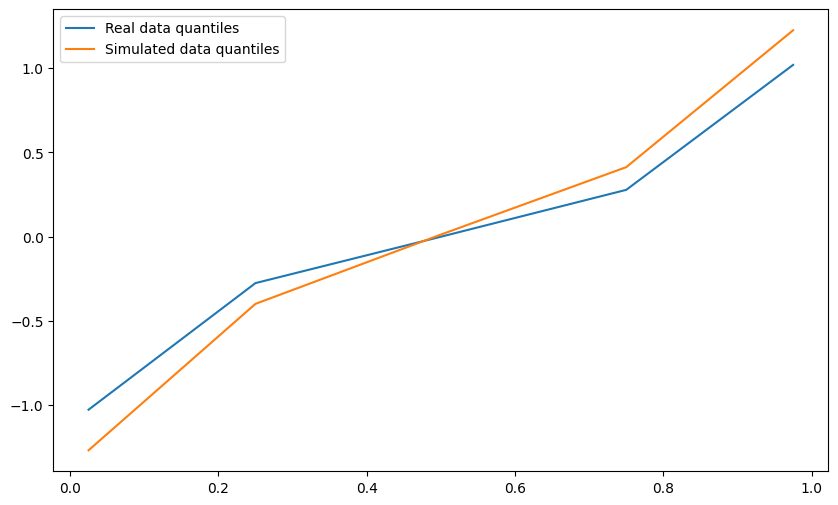

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  -0.0008628384500881284


Real std:  DXY    0.49879
dtype: float64
Simulated std:  1.056490926595719


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -4.71573


Real max:  DXY    2.51896
dtype: float64
Simulated max:  4.17311


Real Median:  DXY   -0.000945
dtype: float64
Simulated Median:  0.00788417




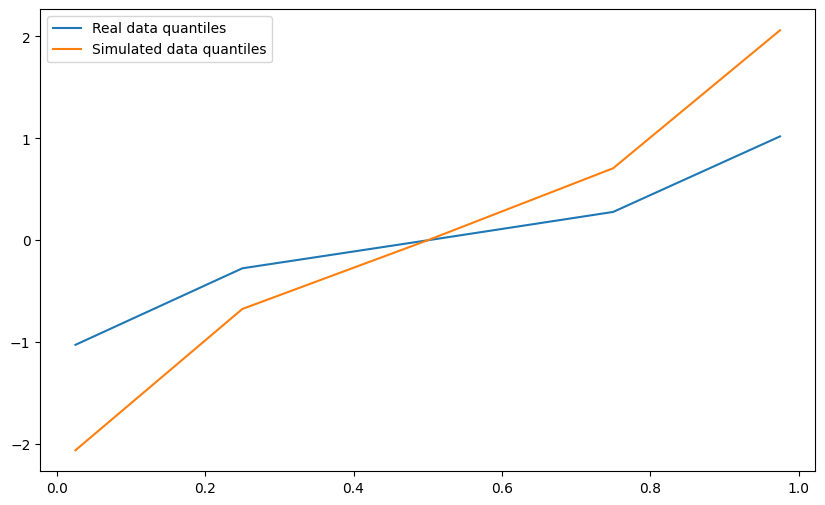

In [10]:
# Loop through rows in sv_y_sim (which each represent a simulated time series) and calculate the mean, stddev, and quantiles. Then compare to the real data.

real_mean = real_data.mean()
real_std = real_data.std()
real_quantiles = real_data.quantile([0.025, 0.25, 0.5, 0.75, 0.975])
real_min = real_data.min()
real_max = real_data.max()

simulated_means = []
simulated_stds = []
simulated_quantiles = []
simulated_mins = []
simulated_maxs = []
simulated_medians = []

for row in range(sv_y_sim.shape[0]):
    sim_data = sv_y_sim.iloc[row]

    sim_mean = sim_data.mean()
    sim_std = sim_data.std()
    sim_quantiles = sim_data.quantile([0.025, 0.25, 0.5, 0.75, 0.975])
    sim_min = sim_data.min()
    sim_max = sim_data.max()
    sim_median = sim_data.median()

    simulated_means.append(sim_mean)
    simulated_stds.append(sim_std)
    simulated_quantiles.append(sim_quantiles)
    simulated_mins.append(sim_min)
    simulated_maxs.append(sim_max)
    simulated_medians.append(sim_median)

# Plot for comparison at select indices:
indices = [row for row in range(0, len(simulated_means), len(simulated_means)//10)]

for idx in indices:
    sim_mean = simulated_means[idx]
    sim_std = simulated_stds[idx]
    sim_quantiles = simulated_quantiles[idx]
    sim_min = simulated_mins[idx]
    sim_max = simulated_maxs[idx]


    print("Real mean: ", real_mean)
    print("Simulated mean: ", sim_mean)
    print("\n")

    print("Real std: ", real_std)
    print("Simulated std: ", sim_std)
    print("\n")

    print("Real min: ", real_min)
    print("Simulated min: ", sim_min)
    print("\n")

    print("Real max: ", real_max)
    print("Simulated max: ", sim_max)
    print("\n")

    print("Real Median: ", real_data.median())
    print("Simulated Median: ", sim_median)
    print("\n")

    # Plot quantiles
    plt.figure(figsize=(10, 6))
    plt.plot(real_quantiles, label="Real data quantiles")
    plt.plot(sim_quantiles, label="Simulated data quantiles")
    plt.legend()

    plt.show()




len of simulated_means:  4000
len of simulated_stds:  4000
len of simulated_quantiles:  4000
len of simulated_mins:  4000
len of simulated_maxs:  4000
len of real_mean:  1
len of real_std:  1
len of real_quantiles:  5
len of real_min:  1
len of real_max:  1


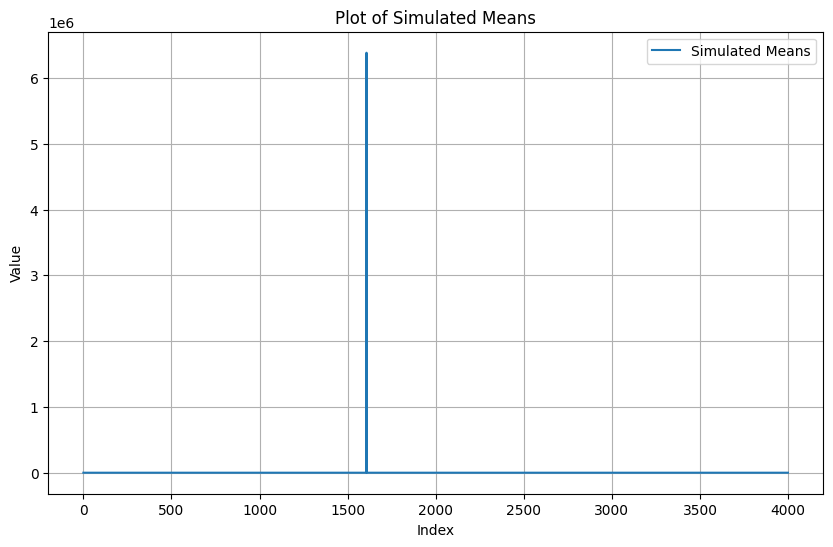

In [11]:
print('len of simulated_means: ', len(simulated_means))
print('len of simulated_stds: ', len(simulated_stds))
print('len of simulated_quantiles: ', len(simulated_quantiles))
print('len of simulated_mins: ', len(simulated_mins))
print('len of simulated_maxs: ', len(simulated_maxs))
print('len of real_mean: ', len(real_mean))
print('len of real_std: ', len(real_std))
print('len of real_quantiles: ', len(real_quantiles))
print('len of real_min: ', len(real_min))
print('len of real_max: ', len(real_max))

simulated_means = np.array(simulated_means)

plt.figure(figsize=(10, 6))
plt.plot(simulated_means, label='Simulated Means')
plt.title('Plot of Simulated Means')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

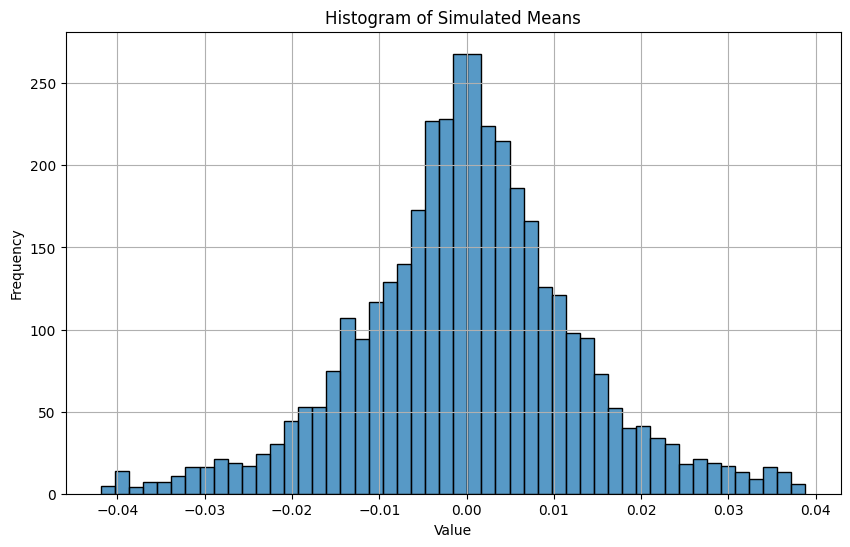

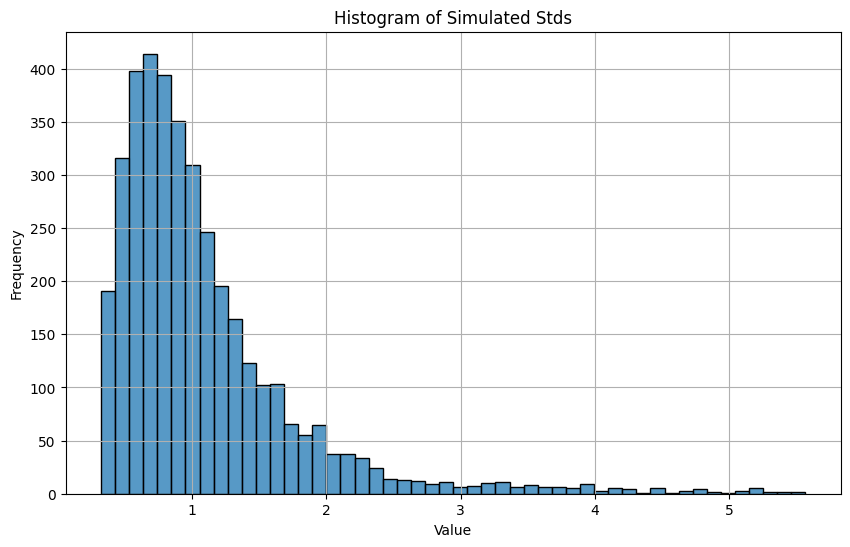

In [12]:
simulated_means = np.array(simulated_means)
simulated_stds = np.array(simulated_stds)
simulated_mins = np.array(simulated_mins)
simulated_maxs = np.array(simulated_maxs)


# Create version of simulated_means and simulated_stds that only includes values between the 2.5th and 97.5th percentiles
truncated_sim_means = simulated_means[(simulated_means > np.quantile(simulated_means, 0.025)) & (simulated_means < np.quantile(simulated_means, 0.975))]
truncated_sim_stds = simulated_stds[(simulated_stds > np.quantile(simulated_stds, 0.025)) & (simulated_stds < np.quantile(simulated_stds, 0.975))]

# Plot the histogram of truncated_sim_means and truncated_sim_stds
plt.figure(figsize=(10, 6))
sns.histplot(truncated_sim_means, bins=50)
plt.title('Histogram of Simulated Means')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(truncated_sim_stds, bins=50)
plt.title('Histogram of Simulated Stds')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




In [13]:
simulated_means

array([ 0.00380812,  0.00350508,  0.00551574, ...,  0.01161189,
       -0.0162872 ,  0.00703656])